<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/images_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
#importando um dataset com imagens de várias coisas(aviâo, pássaros etc)
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
X_train.shape #vai mostrar que tem 50000 imagens, dimensoes de 32 por 32 e 3 rgb(red, green, blue)

(50000, 32, 32, 3)

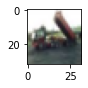

In [10]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[2])

In [11]:
#vamos dividir por 255 para fazer uma escala, isso vai deixar o valor dos pixels entre 0 e 1.
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
#precisamos transformar os valores do y em 0 e 1 categóricos, para fazer isso vamos fazer um Hot Enconding.
#número_classes = 10 pois o y vai de 0 a 9.
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10, dtype='float32')

In [14]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10, dtype='float32')

In [ ]:
#modelbuilding
#aqui vamos usar hidden layers, a última layer tem q ter 10 pois são 10 respostas.
#o flatten é necessário.

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),                  
        keras.layers.Dense(10, activation='sigmoid')                
                         
                          ])
#no loss voce vai botar categorical_crossentropy pois já fizemos o hot code enconding do y 
#se voce não tivessse feito hot enconding, voce botaria sparse_categorical_crossentropy
model.compile(optimizer='SGD', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs = 50)